## Analysing the Covid19 DataSet with pandas and other libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df= pd.read_csv(r"C:\Users\dtdee\OneDrive\Desktop\Letsupgrade_Python\Data_Analysis_Visualisation\covid_19_dataset.csv")

In [41]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [42]:
df.tail()

,Date,State,Region,Confirmed,Deaths,Recovered
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181
320,4/29/2020,Zhejiang,Mainland China,1268,1,1263


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,321.0,9949.800623,31923.853086,0.0,104.0,653.0,4655.0,299691.0
Deaths,321.0,709.152648,3236.162817,0.0,2.0,12.0,144.0,27682.0
Recovered,321.0,3030.277259,14364.870365,0.0,2.0,73.0,587.0,132929.0


<AxesSubplot:>

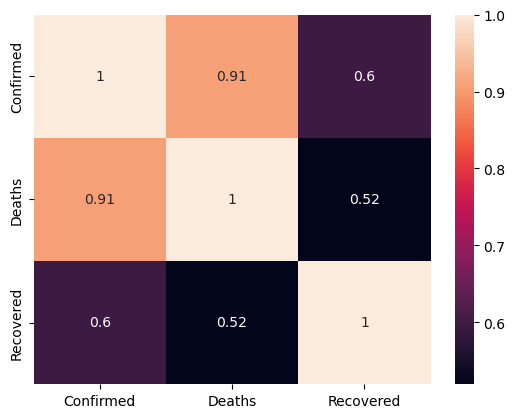

In [45]:
sns.heatmap(df.corr(),annot=True)

In [46]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [49]:
df.fillna('Somestate',inplace=True)

In [53]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Somestate,Afghanistan,1939,60,252
1,4/29/2020,Somestate,Albania,766,30,455
2,4/29/2020,Somestate,Algeria,3848,444,1702
3,4/29/2020,Somestate,Andorra,743,42,423
4,4/29/2020,Somestate,Angola,27,2,7


In [51]:
df.isnull().sum()

Date         0
State        0
Region       0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64

In [52]:
df.columns

Index(['Date', 'State', 'Region', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

### Q. 1) Show the number of Confirmed, Deaths and Recovered cases in each Region.


In [84]:
df.groupby('Region').sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


### Which Region has most no of Deaths

In [98]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Somestate,Afghanistan,1939,60,252
1,4/29/2020,Somestate,Albania,766,30,455


In [113]:
X=df.groupby('Region').sum()['Deaths'].sort_values(ascending=False)[0:10]
X

Region
US             60967
Italy          27682
UK             26166
Spain          24275
France         24121
Belgium         7501
Germany         6467
Iran            5957
Brazil          5513
Netherlands     4727
Name: Deaths, dtype: int64

In [137]:
X.keys()

Index(['US', 'Italy', 'UK', 'Spain', 'France', 'Belgium', 'Germany', 'Iran',
       'Brazil', 'Netherlands'],
      dtype='object', name='Region')

In [171]:
Z=df.groupby('Region')['Confirmed'].sum().sort_values(ascending=False)[0:10]
Z.values

array([1039909,  236899,  203591,  166543,  166441,  161539,  117589,
         99399,   93657,   82862], dtype=int64)

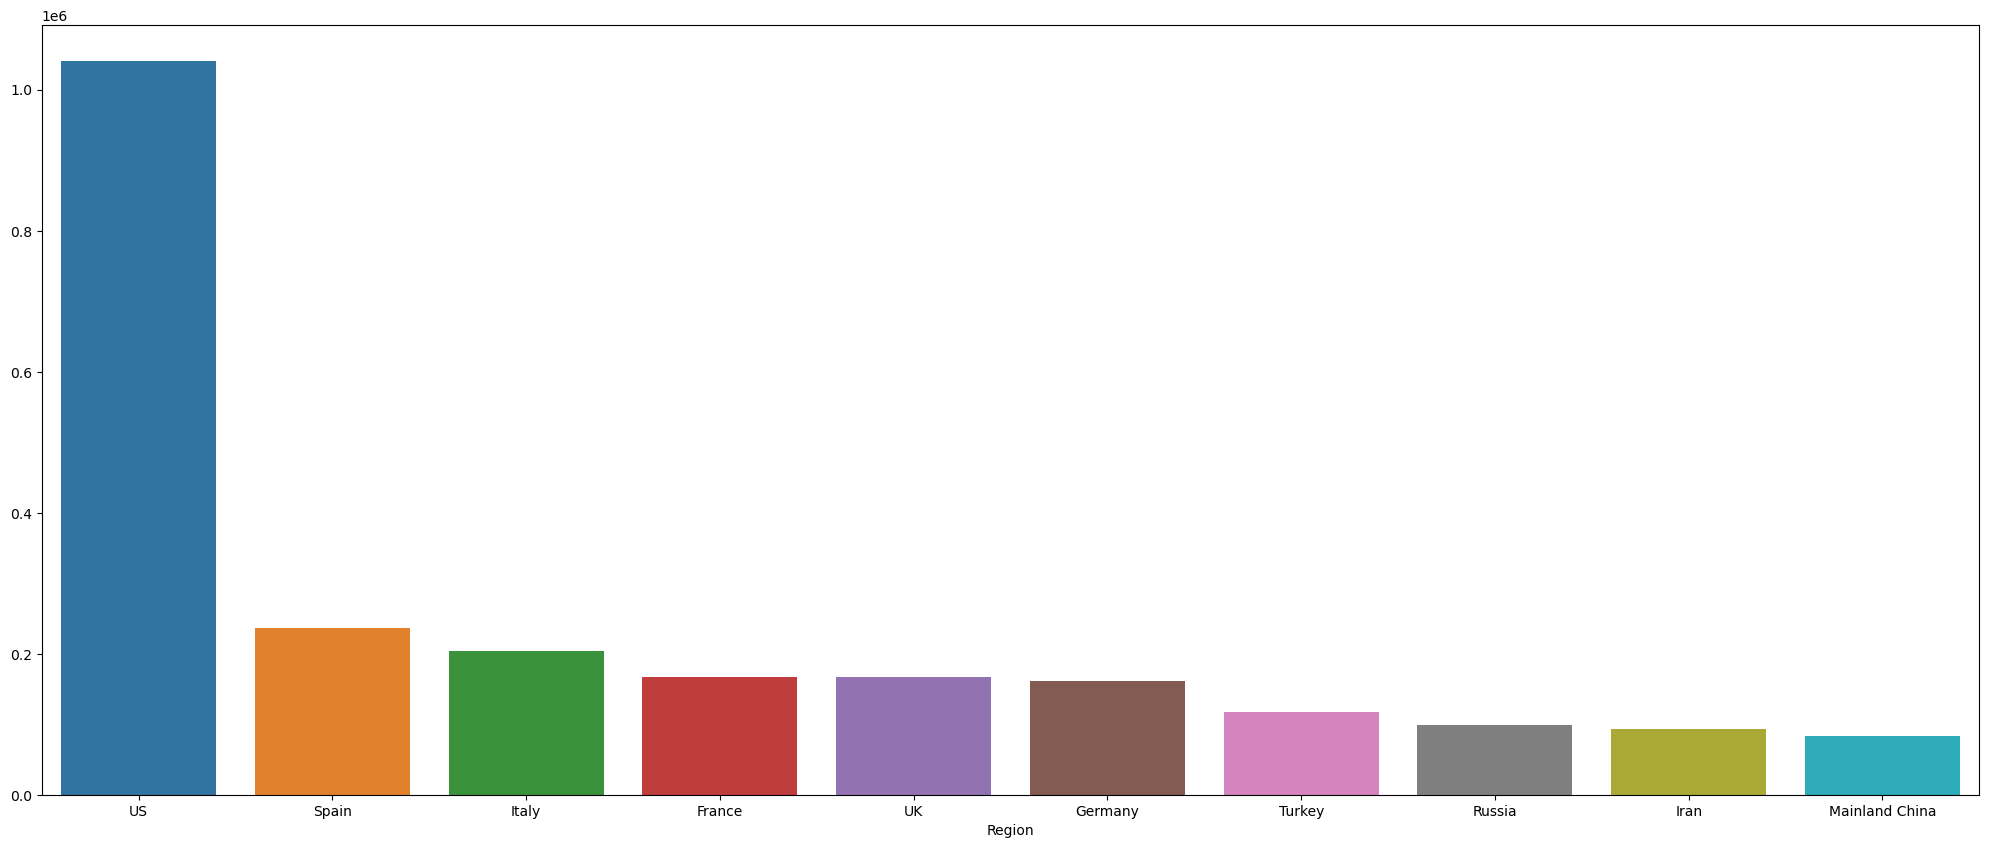

In [185]:
#Plotting barplots for top 10 Which Region has most no of confirmed cases


plt.subplots(figsize=(25,10))
sns.barplot(x=Z.keys()  ,y=Z.values ,data=df)
plt.show()

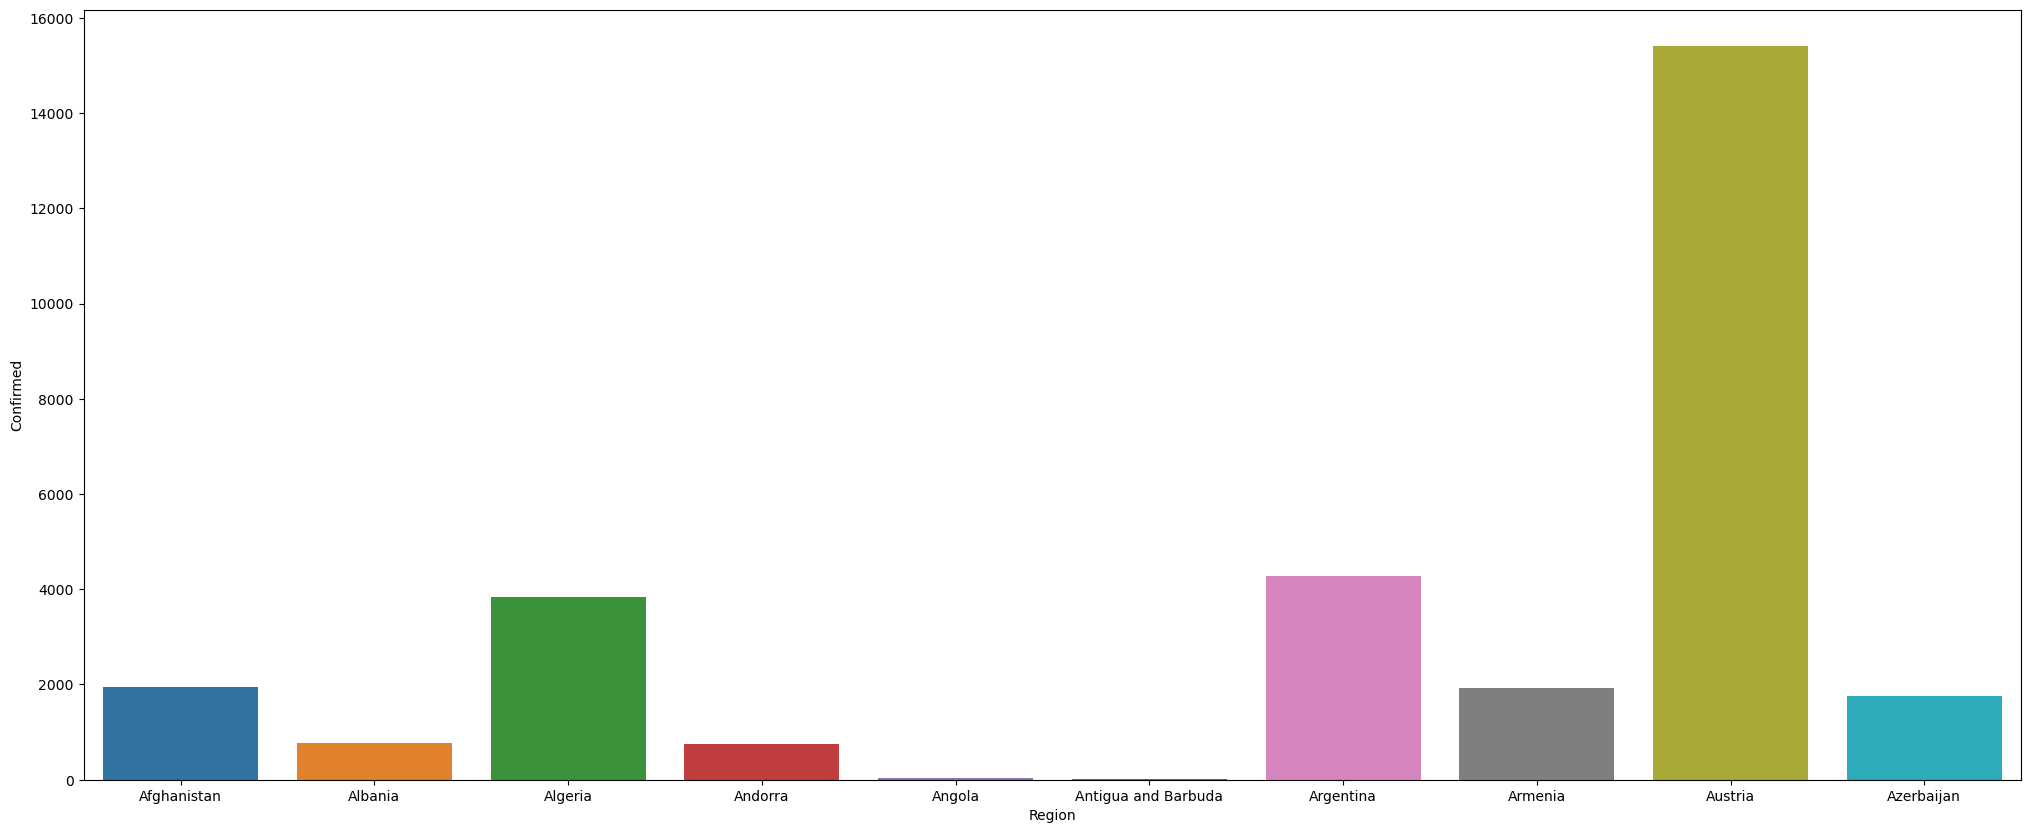

In [135]:
plt.subplots(figsize=(25,10))
sns.barplot(x=df['Region'][0:10],y='Confirmed',data=df)
plt.show()

### Q. 2) Remove all the records where the Confirmed Cases is Less Than 10.


In [138]:
df.head(3)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Somestate,Afghanistan,1939,60,252
1,4/29/2020,Somestate,Albania,766,30,455
2,4/29/2020,Somestate,Algeria,3848,444,1702


In [167]:
data=df[~(df['Confirmed']<10)]

In [168]:
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Somestate,Afghanistan,1939,60,252
1,4/29/2020,Somestate,Albania,766,30,455
2,4/29/2020,Somestate,Algeria,3848,444,1702
3,4/29/2020,Somestate,Andorra,743,42,423
4,4/29/2020,Somestate,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


### Q. 3) In which Region, maximum number of Confirmed cases were recorded ?


In [172]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Somestate,Afghanistan,1939,60,252
1,4/29/2020,Somestate,Albania,766,30,455


In [176]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head()

Region
US        1039909
Spain      236899
Italy      203591
France     166543
UK         166441
Name: Confirmed, dtype: int64

### Q. 4) In which Region, minimum number of Deaths cases were recorded ?


In [177]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Somestate,Afghanistan,1939,60,252
1,4/29/2020,Somestate,Albania,766,30,455


In [200]:
X=df.groupby('Region').min()['Deaths'].sort_values(ascending=True)[0:50]
X

Region
Laos                                0
Rwanda                              0
Papua New Guinea                    0
Cambodia                            0
Canada                              0
Netherlands                         0
Nepal                               0
Namibia                             0
Mozambique                          0
Saint Kitts and Nevis               0
Mongolia                            0
Dominica                            0
Mainland China                      0
Madagascar                          0
Macau                               0
Eritrea                             0
Fiji                                0
France                              0
Holy See                            0
Denmark                             0
Saint Lucia                         0
Central African Republic            0
US                                  0
Yemen                               0
Western Sahara                      0
Vietnam                             0
Ugand

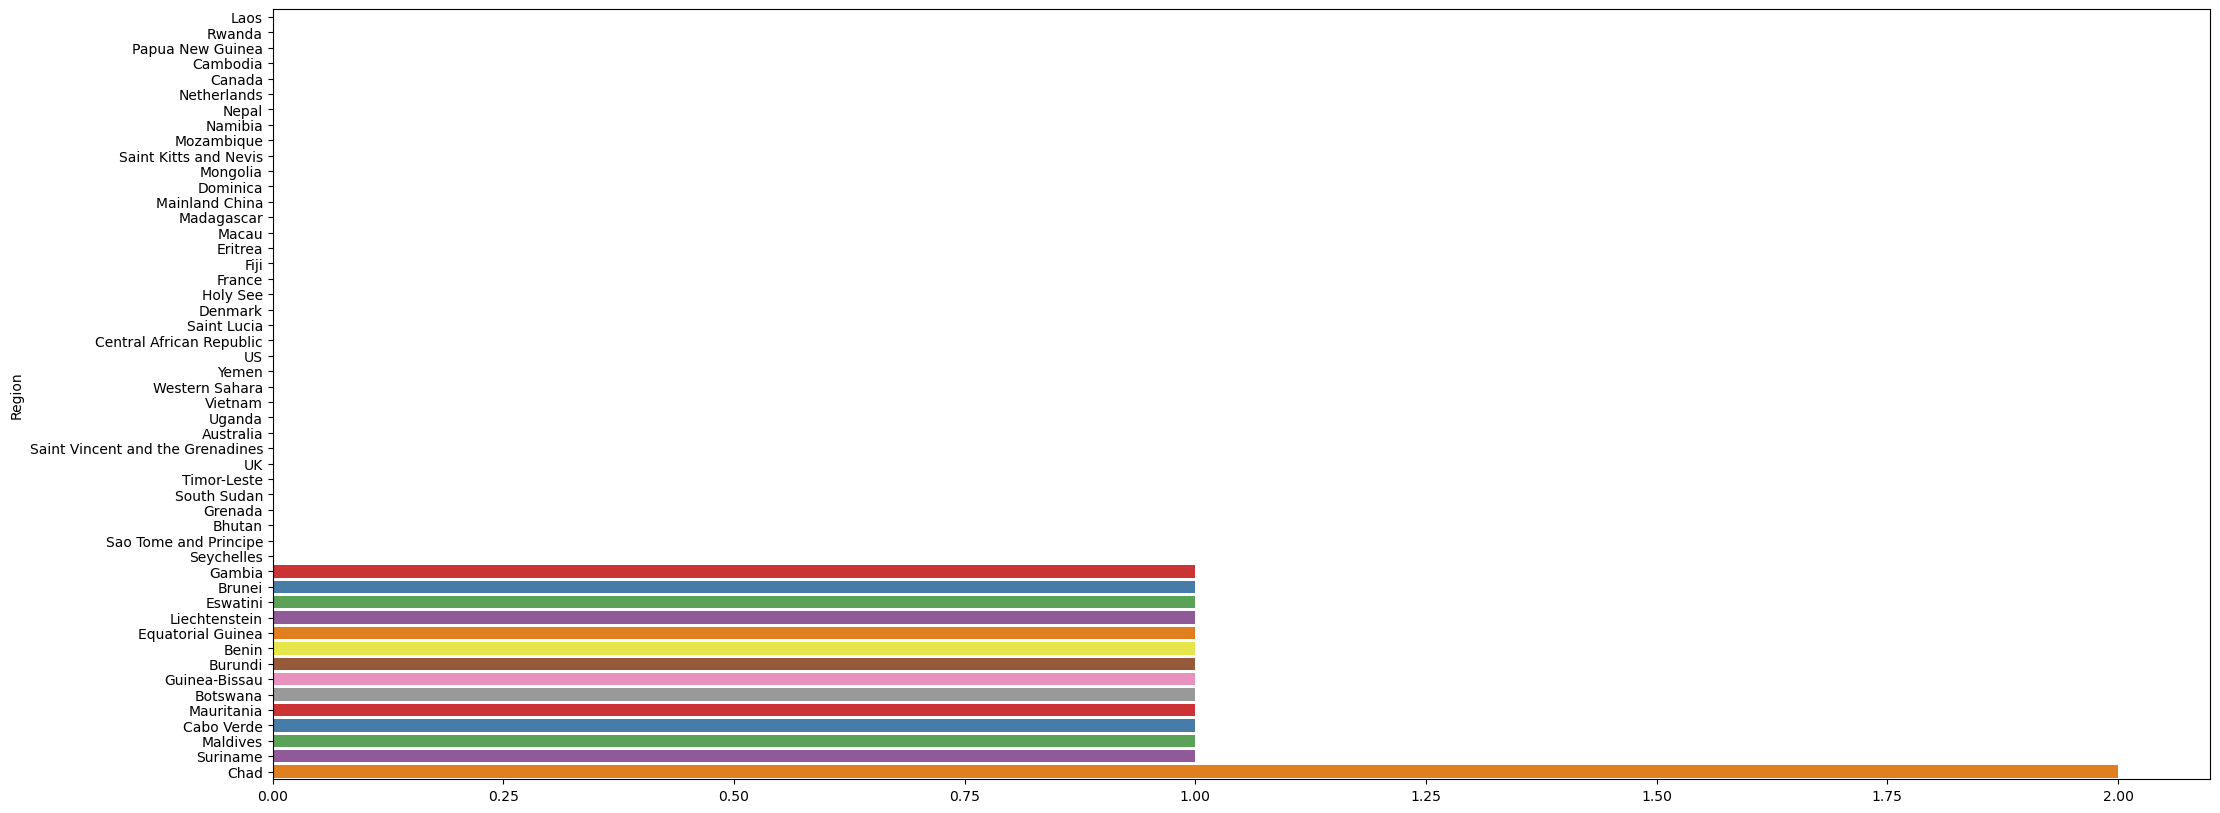

In [202]:
#Plotting barplots for top 10 Which Region has most no of Deaths

plt.subplots(figsize=(25,10))
sns.barplot(y=X.keys()  ,x=X.values ,data=df,palette='Set1')
plt.show()

### Q. 5) How many Confirmed, Deaths & Recovered cases were reported from India till 29 April 2020 ?


In [203]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Somestate,Afghanistan,1939,60,252
1,4/29/2020,Somestate,Albania,766,30,455


In [212]:
df[(df['Region']=='India') & (df['Date']=='4/29/2020')]

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,India,India,33062,1079,8437


### Q. 6-A ) Sort the entire data wrt No. of Confirmed cases in ascending order.


In [215]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,India,Afghanistan,1939,60,252
1,4/29/2020,India,Albania,766,30,455


In [219]:
df.sort_values(by=['Confirmed'],ascending=True)

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,India,US,0,0,120720
284,4/29/2020,India,Canada,0,0,20327
203,4/29/2020,India,Canada,0,1,0
305,4/29/2020,India,Mainland China,1,0,1
289,4/29/2020,India,France,1,0,0
...,...,...,...,...,...,...
57,4/29/2020,India,France,165093,24087,48228
168,4/29/2020,India,UK,165221,26097,0
80,4/29/2020,India,Italy,203591,27682,71252
153,4/29/2020,India,Spain,236899,24275,132929


### Q. 6-B ) Sort the entire data wrt No. of Recovered cases in descending order.

In [222]:
df.sort_values(by='Recovered',ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,India,Spain,236899,24275,132929
285,4/29/2020,India,US,0,0,120720
61,4/29/2020,India,Germany,161539,6467,120400
76,4/29/2020,India,Iran,93657,5957,73791
80,4/29/2020,India,Italy,203591,27682,71252
...,...,...,...,...,...,...
248,4/29/2020,India,US,20849,1078,0
246,4/29/2020,India,Canada,275,6,0
243,4/29/2020,India,US,27660,1845,0
241,4/29/2020,India,US,4537,234,0
